In [1]:
edit_file:str = "/home/sidubois/Data_pangenomes/graph_comparison_paper/yeast_1.annot.tsv" # "/home/sidubois/Data_pangenomes/graph_comparison_paper/yeast_1.annot.tsv"
reference_name:str = "CASBJU01"
graph_A:str = "/home/sidubois/Data_pangenomes/graph_comparison_paper/mg_yeast_1.gfa"
graph_B:str = "/home/sidubois/Data_pangenomes/graph_comparison_paper/pggb_yeast_1.gfa"

In [2]:
from matplotlib import pyplot as plt
from gfagraphs import Graph

In [3]:
edit_sizes:dict[str,list[int]] = dict()
edited_nodes_lengths:dict[int,int] = dict()

In [4]:
# Edit sizes on nodes =< 50
all_edits_loweq50 = list()
all_edits_nodesized = list()
# lengths, puis node lengthsx
with open(edit_file, "r") as f:
    for line in f:
        if line.startswith("#"):
            continue
        line = line.strip().split("\t")
        all_edits_nodesized.append(int(line[-2]))
        if int(line[-1]) <= 50:
            all_edits_loweq50.append(int(line[-2])) 
            
# Compute mean, upper and lower quartiles
mean = sum(all_edits_loweq50)/len(all_edits_loweq50)
all_edits_loweq50.sort()
n = len(all_edits_loweq50)
q1 = all_edits_loweq50[n//4]
q3 = all_edits_loweq50[3*n//4]
print(f"Mean: {mean}, Q1: {q1}, Q3: {q3}")
# Percentage of elements == 1
print(f"Percentage of elements == 1: {all_edits_loweq50.count(1)/len(all_edits_loweq50)}")
# Same thing for all edits
mean = sum(all_edits_nodesized)/len(all_edits_nodesized)
all_edits_nodesized.sort()
n = len(all_edits_nodesized)
q1 = all_edits_nodesized[n//4]
q3 = all_edits_nodesized[3*n//4]
print(f"Mean: {mean}, Q1: {q1}, Q3: {q3}")
# Percentage of elements == 1
print(f"Percentage of elements == 1: {all_edits_nodesized.count(1)/len(all_edits_nodesized)}")

Mean: 1.3932084279100783, Q1: 1, Q3: 1
Percentage of elements == 1: 0.845971351261237
Mean: 1.4909372540691792, Q1: 1, Q3: 1
Percentage of elements == 1: 0.8361460532397287


In [5]:
with open(edit_file, "r") as f:
    for line in f:
        if line.startswith("#"):
            continue
        line = line.strip().split("\t")
        if line[0] not in edit_sizes:
            edit_sizes[line[0]] = list()
        edit_sizes[line[0]].append(int(line[-2]))
        if int(line[-1]) not in edited_nodes_lengths:
            edited_nodes_lengths[int(line[-1])] = 0
        edited_nodes_lengths[int(line[-1])] += 1

Text(0.5, 1.0, 'Edit sizes for reference CASBJU01')

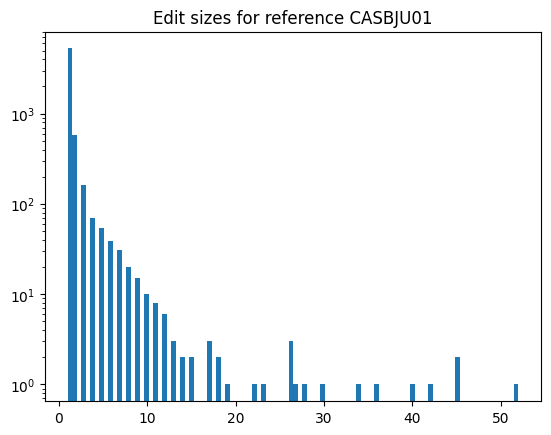

In [6]:
# Make the barplot for reference name
# Put y-axis in log scale
plt.figure()
plt.hist(edit_sizes[reference_name], bins=100)
plt.yscale("log")
plt.title(f"Edit sizes for reference {reference_name}")

In [7]:
# Compute mean, median, max and min for reference name
mean = sum(edit_sizes[reference_name]) / len(edit_sizes[reference_name])
median = sorted(edit_sizes[reference_name])[len(edit_sizes[reference_name]) // 2]
max_ = max(edit_sizes[reference_name])
min_ = min(edit_sizes[reference_name])

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Max: {max_}")
print(f"Min: {min_}")

Mean: 1.45855827246745
Median: 1
Max: 52
Min: 1


In [8]:
# Compute the node size for all the paths in the graph
gfa_A = Graph(graph_A)

path_nodes_lengths_A:dict[str,list[int]] = dict()

for path_name,path_data in gfa_A.paths.items():
    path_nodes_lengths_A[path_name] = list()
    for node,_ in path_data['path']:
        path_nodes_lengths_A[path_name].append(gfa_A.segments[node]['length'])
        
# Same for the second graph
gfa_B = Graph(graph_B)

path_nodes_lengths_B:dict[str,list[int]] = dict()

for path_name,path_data in gfa_B.paths.items():
    if path_name not in path_nodes_lengths_B:
        path_nodes_lengths_B[path_name] = list()
    for node,_ in path_data['path']:
        path_nodes_lengths_B[path_name].append(gfa_B.segments[node]['length'])


([<matplotlib.axis.XTick at 0x7f5a79c49650>,
 [Text(0, 0, 'A'), Text(1, 0, 'B')])

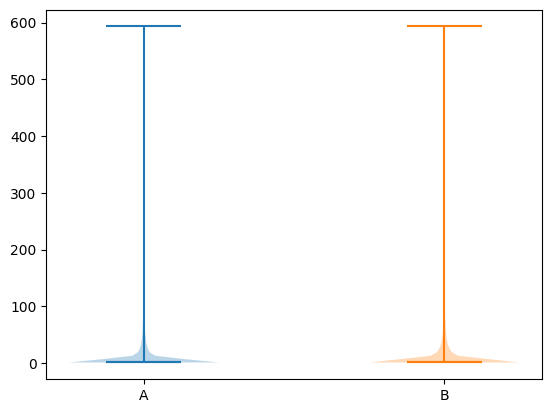

In [9]:
# Violin plot for the node sizes (A and B side to side)
plt.figure()
plt.violinplot(path_nodes_lengths_A[reference_name], positions=[0], showmedians=True)
plt.violinplot(path_nodes_lengths_B[reference_name], positions=[1], showmedians=True)
plt.xticks([0,1], ["A", "B"])



Text(0.5, 1.0, 'Node sizes distribution for reference path')

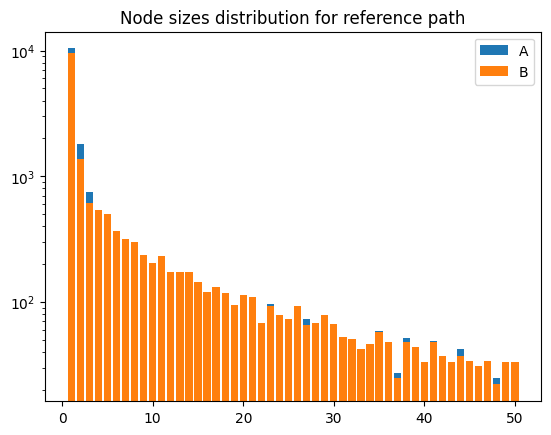

In [10]:
# Barplot of the node sizes from 1 to 50 for A and B
from collections import Counter
plt.figure()
counts_reference_A = Counter(path_nodes_lengths_A[reference_name])
counts_reference_B = Counter(path_nodes_lengths_B[reference_name])
x = list(range(1,51))
y_A = [counts_reference_A[i] for i in x]
y_B = [counts_reference_B[i] for i in x]
plt.bar(x, y_A, label="A")
plt.bar(x, y_B, label="B")
plt.yscale("log")
plt.legend()
plt.title("Node sizes distribution for reference path")

In [11]:
edits_on_nodes_sizes:dict[int,int] = dict()
with open(edit_file, "r") as f:
    for line in f:
        if line.startswith("#"):
            continue
        line = line.strip().split("\t")
        if (line[-1]) not in edit_sizes:
            edit_sizes[line[0]] = list()
        edit_sizes[line[0]].append(int(line[-2]))
        if int(line[-1]) not in edited_nodes_lengths:
            edited_nodes_lengths[int(line[-1])] = 0
        edited_nodes_lengths[int(line[-1])] += 1

In [12]:
# Put side to side node distribution and number of editions on nodes of size x

(array([219.,   5.,   2.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.000000e+00, 8.383200e+02, 1.674640e+03, 2.510960e+03,
        3.347280e+03, 4.183600e+03, 5.019920e+03, 5.856240e+03,
        6.692560e+03, 7.528880e+03, 8.365200e+03, 9.201520e+03,
        1.003784e+04, 1.087416e+04, 1.171048e+04, 1.254680e+04,
        1.338312e+04, 1.421944e+04, 1.505576e+04, 1.589208e+04

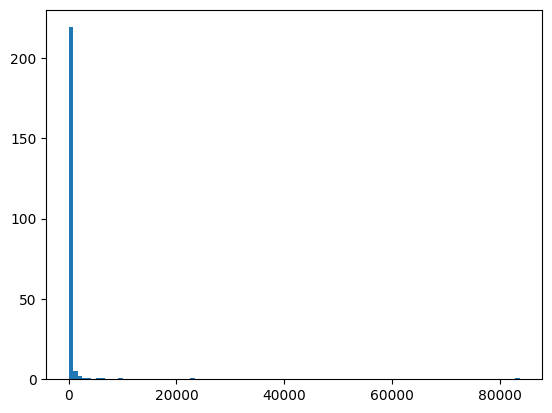

In [13]:
# Plot the distribution of edited nodes lengths
plt.figure()
plt.hist(edited_nodes_lengths.values(), bins=100)

Edits : 97.34925611782195%
Node coverage : 39.50566513698564%
3.824129029125938 52.236643223864185


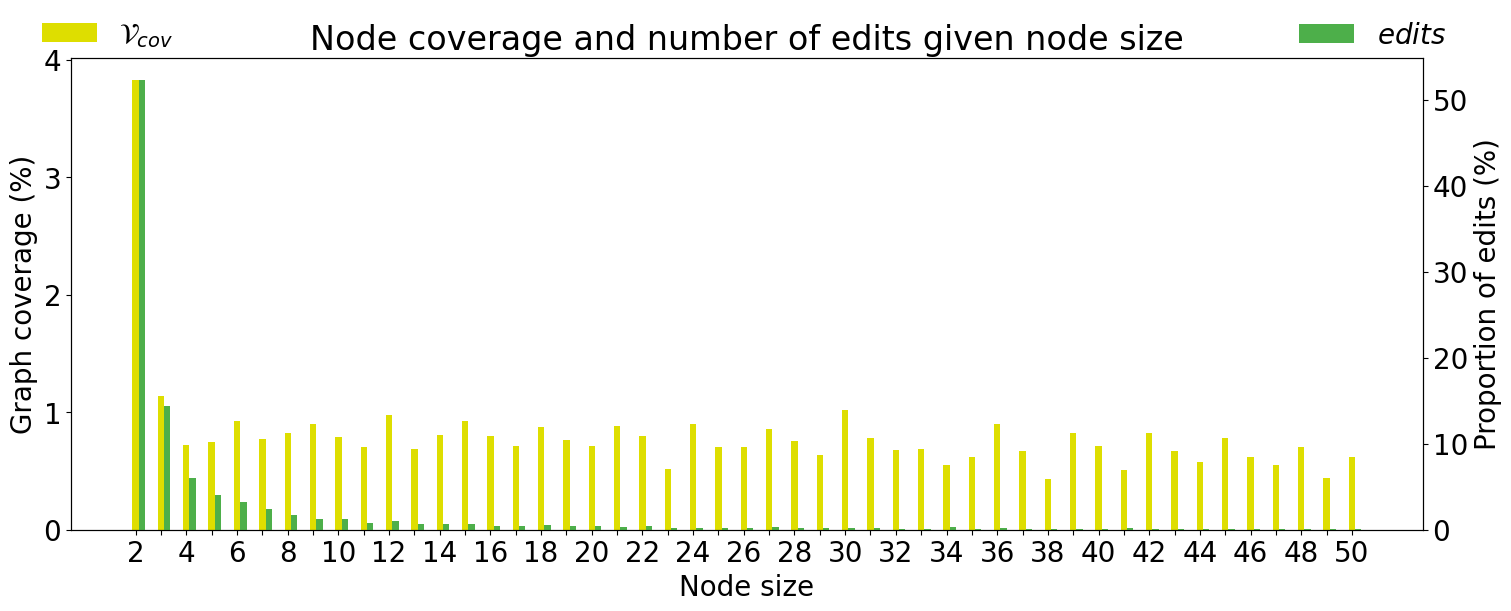

In [14]:
# On va chercher à représenter la portion d'éditions sur les noeuds de taille x
# et figurer à côté la surface couverte par les noeuds de taille x
colors:dict[str,str] = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
}

from collections import Counter
from numpy import arange
# Compte de la taille des noeuds
counts_reference_A = Counter()
for path_desc in path_nodes_lengths_A.values():
    counts_reference_A.update(path_desc)
counts_reference_B = Counter()
for path_desc in path_nodes_lengths_B.values():
    counts_reference_B.update(path_desc)
x = list(range(1,51))
y_A = [counts_reference_A[i]*i for i in x[:-1]]
y_B = [counts_reference_B[i]*i for i in x[:-1]]
total_length = sum([sum(path_nodes_lengths_A[u]) for u in path_nodes_lengths_A.keys()])
y_Mean = [(((y_A[i] + y_B[i]) / 2)/total_length)*100 for i in range(len(y_A))]

edits_on_nodelenghts={i:0 for i in x}
total = 0
with open(edit_file, "r") as f:
    for line in f:
        if line.startswith("#"):
            continue
        line = line.strip().split("\t")
        #if line[0] != reference_name:
        #    continue
        total += 1
        if int(line[-1]) not in edits_on_nodelenghts:
            continue
        edits_on_nodelenghts[int(line[-1])] += 1
        
y_C = [(edits_on_nodelenghts[i]/total)*100 for i in x[:-1]]
        
width = 0.25  # the width of the bars
multiplier = 0
x = arange(len(range(1,51)[1:]))

# Set font size to 20
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(layout='constrained', figsize=(15, 6))

# Clone axis and put it on the other side
ax2 = ax.twinx()
axs = [ax, ax2]
cols = [colors['yellow'], colors['green']]

for attribute, measurement in {'$\mathcal{V}_{cov}$':y_Mean,'$edits$':y_C}.items():
    offset = width * multiplier
    rects = axs[multiplier].bar(x + offset, measurement, width, label=attribute, color=cols[multiplier])
    #axs[multiplier].bar_label(rects, padding=3)
    multiplier += 1

print(f"Edits : {sum(y_C)}%")
print(f"Node coverage : {sum(y_Mean)}%")
print(y_Mean[0],y_C[0])

# Set x-ticks labels to 2..50 and only show even numbers
ax.set_xticks(x)
ax.set_xticklabels([j if j%2==0 else '' for j in range(2,51)])
plt.title("Node coverage and number of edits given node size")
ax.legend(loc=(-.03,.995),frameon=False)
ax2.legend(loc=(.90,.995),frameon=False)
ax.set_xlabel("Node size")
ax.set_ylabel("Graph coverage (%)")
ax2.set_ylabel("Proportion of edits (%)")
plt.savefig("SF2A.eps")